In [44]:
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt
from sage_data_client import query
import numpy as np

In [51]:
def get_measurements(vsn, name):
    return query(
    start="-5m",
    filter={
        "name": name,
        "vsn": vsn.upper(),
        }
    )

In [52]:
w024 = get_measurements("w024", name="env.raingauge.event_acc")
w024_ticks = get_measurements("w024", name="env.raingauge.rint")

<AxesSubplot: xlabel='timestamp'>

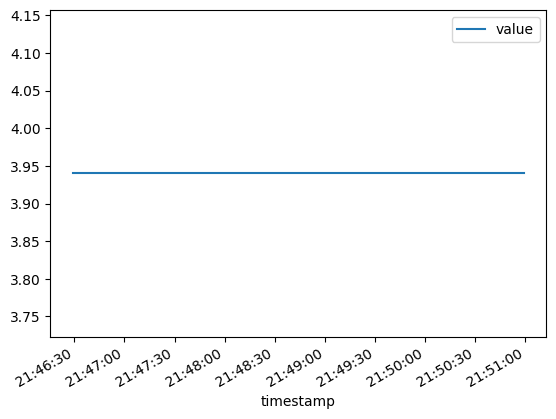

In [53]:
w024.plot(x="timestamp", y="value")

<AxesSubplot: >

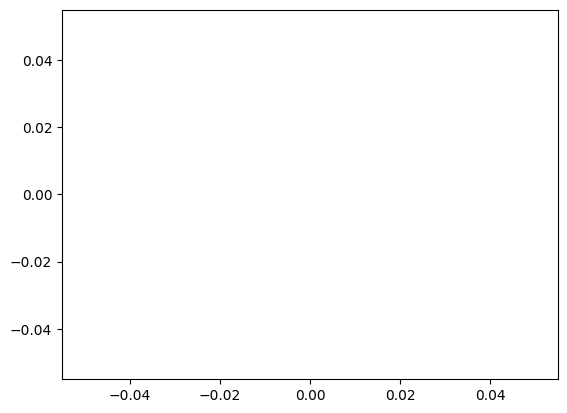

In [48]:
w024["value"].diff().diff().plot()

In [49]:
w024["1st_derivative"] = w024["value"].diff() / w024["timestamp"].diff().dt.total_seconds()

In [43]:
any(w024["1st_derivative"].to_numpy() > 0.0003)

True